# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
matplotlib.rcParams['figure.figsize'] = (10, 4)

In [3]:
housing_df = pd.read_csv("./HW2_Housing_Survey.csv")
housing_df

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJUST,WGTP,NP,TYPE,...,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
0,H,186,8,700,4,16,1015675,89,4,1,...,81,27,93,151,28,79,25,101,157,129
1,H,306,8,700,4,16,1015675,310,1,1,...,292,401,81,494,346,496,615,286,454,260
2,H,395,8,100,4,16,1015675,106,2,1,...,123,119,168,107,95,101,30,124,106,31
3,H,506,8,700,4,16,1015675,240,4,1,...,68,359,385,71,234,421,76,77,242,231
4,H,835,8,800,4,16,1015675,118,4,1,...,127,36,119,121,116,209,97,176,144,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,H,1357238,8,300,4,16,1015675,108,2,1,...,198,88,112,26,64,106,142,106,33,111
6492,H,1357340,8,400,4,16,1015675,58,2,1,...,66,101,62,52,105,75,20,127,105,68
6493,H,1357874,8,900,4,16,1015675,32,2,1,...,7,8,12,37,44,36,28,33,48,59
6494,H,1357880,8,500,4,16,1015675,123,2,1,...,201,123,38,104,186,203,132,118,201,125


In [4]:
housing_df.describe()

,SERIALNO,DIVISION,PUMA,REGION,ST,ADJUST,WGTP,NP,TYPE,ACR,...,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
count,6.496000e+03,6496.0,6496.000000,6496.0,6496.0,6496.0,6496.000000,6496.000000,6496.000000,5501.000000,...,6496.000000,6496.00000,6496.00000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000
mean,6.841337e+05,8.0,486.222291,4.0,16.0,1015675.0,94.781866,2.298491,1.069581,1.357026,...,94.791564,94.77694,94.77186,94.780172,94.769243,94.786330,94.783867,94.773399,94.775400,94.777401
std,3.906547e+05,0.0,270.498896,0.0,0.0,0.0,73.523809,1.563549,0.315509,0.624471,...,92.988570,95.56488,91.49636,93.275930,92.415760,92.950416,92.465471,94.253192,92.665848,97.097489
min,1.860000e+02,8.0,100.000000,4.0,16.0,1015675.0,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.464415e+05,8.0,300.000000,4.0,16.0,1015675.0,50.000000,1.000000,1.000000,1.000000,...,30.000000,29.00000,31.00000,30.000000,30.000000,30.000000,30.000000,30.000000,31.000000,28.000000
50%,6.869500e+05,8.0,500.000000,4.0,16.0,1015675.0,83.000000,2.000000,1.000000,1.000000,...,74.000000,73.00000,75.00000,74.000000,75.000000,75.000000,74.000000,73.000000,74.000000,72.000000
75%,1.024785e+06,8.0,700.000000,4.0,16.0,1015675.0,115.000000,3.000000,1.000000,2.000000,...,126.000000,125.00000,124.00000,124.000000,125.000000,124.000000,125.000000,125.000000,124.000000,126.000000
max,1.358490e+06,8.0,900.000000,4.0,16.0,1015675.0,588.000000,11.000000,3.000000,3.000000,...,918.000000,891.00000,832.00000,1023.000000,880.000000,815.000000,908.000000,1010.000000,847.000000,897.000000


# Question 1: Properties worth more than $1,000,000

In [5]:
million_count = housing_df[housing_df["VAL"]==24].shape[0]
print(f"There are { million_count } properties worth more than $1,000,000")
print(f"To which accounts for { round(million_count/housing_df.shape[0]*100,3) }% of the data (total: { housing_df.shape[0] })")

There are 53 properties worth more than $1,000,000
To which accounts for 0.816% of the data (total: 6496)


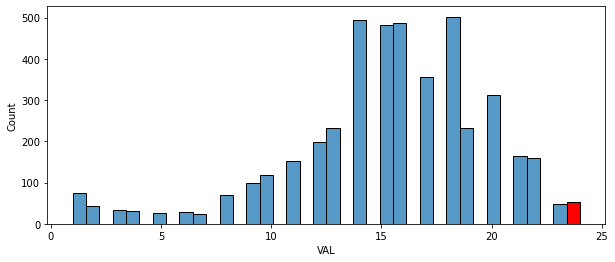

In [6]:
bar = sns.histplot(x=housing_df.VAL)
bar.patches[len(bar.patches)-1].set_facecolor('#FF0000')

# Question 2: Average of people recorded in house

<AxesSubplot:xlabel='NP', ylabel='count'>

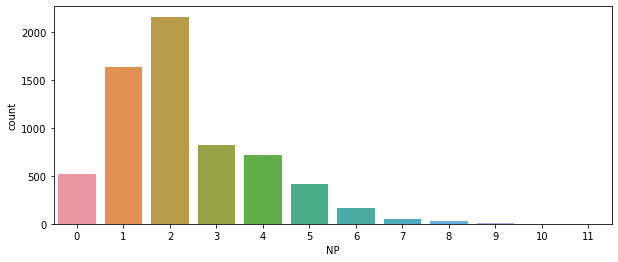

In [7]:
sns.countplot(x=housing_df.NP)

In [8]:
average_recorded = housing_df["NP"].mean()
print(f"There are in average { average_recorded } persons recorded in a house")

There are in average 2.2984913793103448 persons recorded in a house


# Question 3: Property value vs Persons recorded

<AxesSubplot:xlabel='NP', ylabel='VAL'>

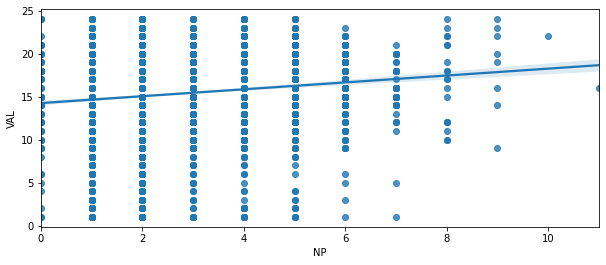

In [9]:
sns.regplot(x=housing_df.NP, y=housing_df.VAL)

# Question 4: Normalization

Unnormalized

<AxesSubplot:xlabel='FINCP', ylabel='Count'>

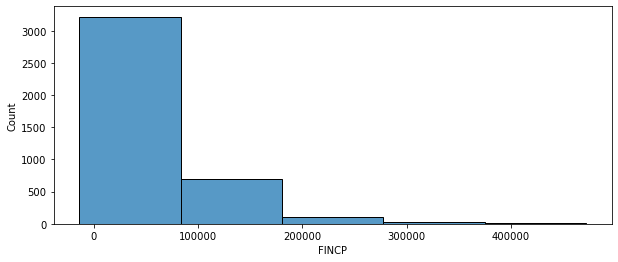

In [10]:
sns.histplot(x=housing_df.FINCP, bins=5)

Normalized

<AxesSubplot:ylabel='Count'>

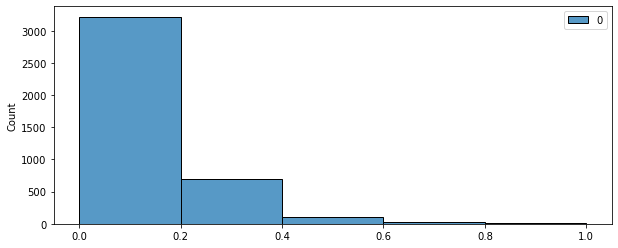

In [17]:
fin_income = housing_df.FINCP
scaler = MinMaxScaler()
fin_norm = scaler.fit_transform(housing_df["FINCP"].values.reshape(-1,1))
sns.histplot(fin_norm, bins=5)